前処理（データの整形、外れ値処理、正規化）

In [3]:
import pandas as pd
import numpy as np
data=pd.read_csv("/home/masataka/workspace/dummy_mercari/data/aug_first_cpn_data_for_ab_test_sensibility_tsukuba.csv")


In [4]:
# 外れ値の除去
from scipy import stats
def remove_outliers_zscore(data, metric, threshold=2):
    z_scores = np.abs(stats.zscore(data[metric]))
    data = data[(z_scores < threshold)]
    return data

data = remove_outliers_zscore(data, 'GMV')

In [5]:
#process_features
from sklearn.preprocessing import StandardScaler
import pandas as pd

def process_features(data):
    columns_list = ['hist_4_day_buy_num', 'hist_4_day_gmv', 'his_4_day_is_buy',
       'hist_30_day_buy_days', 'hist_30_day_buy_num', 'hist_30_day_gmv',
       'hist_30_day_buy_recency', 'hist_30_day_pay_days', 'hist_30_day_atpu',
       'hist_30_day_gpv', 'hist_30_day_pay_recency', 'hist_30_day_list_days',
       'hist_30_day_list_num', 'hist_30_day_list_recency',
       'hist_30_day_like_count', 'hist_30_day_like_count_not_deleted',
       'hist_30_day_like_recency','PCA0','PCA1','PCA2','PCA3','PCA4','PCA5']

    # columns_listに存在する列のみを抽出
    features_list = [column for column in data.columns if column in columns_list]
    features = data[features_list]

    # 数値列の標準化
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    # 列名をfeatures_listのものに付け直す
    scaled_features = pd.DataFrame(scaled_features, columns=features_list)

    return scaled_features


In [6]:
# データを実験ごとに分割する
data0=data[data['variant']=='control'].sample(n=1000000, random_state=42)
data2=data[data['variant']=='test2'].sample(n=1000000, random_state=42)


K-meansクラスタリング

In [7]:
from sklearn.cluster import KMeans

def kmeans_cluster(data, cluster_num=6):
    processed_data = process_features(data)

    # k-meansクラスタリングの適用
    kmeans = KMeans(n_clusters=cluster_num, init='k-means++',random_state=42)
    clusters = kmeans.fit_predict(processed_data)

    # 結果を元のデータフレームに追加
    data['kmeans_cluster'] = clusters

    return data

kmeans_cluster(data0)
kmeans_cluster(data2)

/home/masataka/workspace/dummy_mercari/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/masataka/workspace/dummy_mercari/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Unnamed: 0,variant,segment,distribution_date,TRX,GMV,buyer,hist_4_day_buy_num,hist_4_day_gmv,his_4_day_is_buy,...,hist_30_day_atpu,hist_30_day_gpv,hist_30_day_pay_recency,hist_30_day_list_days,hist_30_day_list_num,hist_30_day_list_recency,hist_30_day_like_count,hist_30_day_like_count_not_deleted,hist_30_day_like_recency,kmeans_cluster
2085584,2085584,test2,b_a2,2022-08-11,0,0,0.0,0,0,0.0,...,0,0.0,31,0,0,31,1,1,17,1
2707668,2707668,test2,b_a2,2022-08-11,0,0,0.0,1,1699,1.0,...,4,2664.0,10,11,42,2,6,0,2,3
2271963,2271963,test2,b_a2,2022-08-11,1,1480,1.0,0,0,0.0,...,0,0.0,31,0,0,31,10,16,4,2
1958147,1958147,test2,b_a2,2022-08-11,0,0,0.0,0,0,0.0,...,4,975.0,4,0,0,31,3,7,15,3
5875357,5875357,test2,b_a3,2022-08-11,1,1300,1.0,1,26500,1.0,...,0,0.0,31,7,17,4,30,44,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2777209,2777209,test2,b_a2,2022-08-11,0,0,0.0,1,3300,1.0,...,0,0.0,31,0,0,31,7,16,2,0
1910956,1910956,test2,b_a2,2022-08-11,0,0,0.0,0,0,0.0,...,0,0.0,31,0,0,31,1,1,9,2
2891768,2891768,test2,b_a2,2022-08-11,0,0,0.0,0,0,0.0,...,0,0.0,31,0,0,31,0,0,31,1
2922918,2922918,test2,b_a2,2022-08-11,0,0,0.0,0,0,0.0,...,0,0.0,31,0,0,31,3,0,19,1


In [ ]:
# # 重要度で重みづけするコード
# from sklearn.ensemble import RandomForestRegressor
# import numpy as np
# import matplotlib.pyplot as plt

# data0_exp = data0.sample(n=100000, random_state=42)

# # 特徴量とターゲットの分割
# X = process_features(data0_exp)
# y = data0_exp['GMV']

# # ランダムフォレストモデルの構築
# rf = RandomForestRegressor(n_estimators=100, random_state=42)
# rf.fit(X, y)

# # 特徴量の重要度を取得
# feature_importances = rf.feature_importances_

# def weighted_kmeans(data,cluster_num=6):
#     processed_data = process_features(data)
#     weighted_features = processed_data * feature_importances

#     # k-meansクラスタリングの適用
#     kmeans = KMeans(n_clusters=cluster_num, init='k-means++',random_state=42)
#     clusters = kmeans.fit_predict(weighted_features)

#     # 結果を元のデータフレームに追加
#     data['weighted_kmeans_cluster'] = clusters

#     return data

In [42]:
# weighted_kmeans(data0)
# weighted_kmeans(data2)

/home/masataka/workspace/dummy_mercari/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/masataka/workspace/dummy_mercari/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Unnamed: 0,variant,segment,distribution_date,TRX,GMV,buyer,hist_4_day_buy_num,hist_4_day_gmv,his_4_day_is_buy,...,hist_30_day_list_num,hist_30_day_list_recency,hist_30_day_like_count,hist_30_day_like_count_not_deleted,hist_30_day_like_recency,kmeans_cluster,weighted_kmeans_cluster,pca_kmeans_cluster,pred_elastic,pred_lightgbm
2085584,2085584,test2,b_a2,2022-08-11,0,0,0.0,0,0,0.0,...,0,31,1,1,17,1,0,2,236.411695,207.111289
2707668,2707668,test2,b_a2,2022-08-11,0,0,0.0,1,1699,1.0,...,42,2,6,0,2,3,5,1,1603.636416,1105.920593
2271963,2271963,test2,b_a2,2022-08-11,1,1480,1.0,0,0,0.0,...,0,31,10,16,4,2,5,0,1056.948111,601.719895
1958147,1958147,test2,b_a2,2022-08-11,0,0,0.0,0,0,0.0,...,0,31,3,7,15,3,0,0,211.584130,207.111289
5875357,5875357,test2,b_a3,2022-08-11,1,1300,1.0,1,26500,1.0,...,17,4,30,44,1,4,4,4,6740.064023,12020.554000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2777209,2777209,test2,b_a2,2022-08-11,0,0,0.0,1,3300,1.0,...,0,31,7,16,2,0,5,5,1236.241937,1350.815834
1910956,1910956,test2,b_a2,2022-08-11,0,0,0.0,0,0,0.0,...,0,31,1,1,9,2,0,0,218.539765,263.600902
2891768,2891768,test2,b_a2,2022-08-11,0,0,0.0,0,0,0.0,...,0,31,0,0,31,1,0,2,119.418133,218.873414
2922918,2922918,test2,b_a2,2022-08-11,0,0,0.0,0,0,0.0,...,0,31,3,0,19,1,0,2,301.480911,207.251559


In [8]:
from sklearn.decomposition import PCA
def pca_kmeans(data,cluster_num=6):
    processed_data = process_features(data)
    pca = PCA(n_components=1)
    principal_components = pca.fit_transform(processed_data)

    # k-meansクラスタリングの適用
    kmeans = KMeans(n_clusters=cluster_num, init='k-means++',random_state=42)
    clusters = kmeans.fit_predict(principal_components)

    # 結果を元のデータフレームに追加
    data['pca_kmeans_cluster'] = clusters
    return data

pca_kmeans(data0)
pca_kmeans(data2)

/home/masataka/workspace/dummy_mercari/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/masataka/workspace/dummy_mercari/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Unnamed: 0,variant,segment,distribution_date,TRX,GMV,buyer,hist_4_day_buy_num,hist_4_day_gmv,his_4_day_is_buy,...,hist_30_day_gpv,hist_30_day_pay_recency,hist_30_day_list_days,hist_30_day_list_num,hist_30_day_list_recency,hist_30_day_like_count,hist_30_day_like_count_not_deleted,hist_30_day_like_recency,kmeans_cluster,pca_kmeans_cluster
2085584,2085584,test2,b_a2,2022-08-11,0,0,0.0,0,0,0.0,...,0.0,31,0,0,31,1,1,17,1,2
2707668,2707668,test2,b_a2,2022-08-11,0,0,0.0,1,1699,1.0,...,2664.0,10,11,42,2,6,0,2,3,1
2271963,2271963,test2,b_a2,2022-08-11,1,1480,1.0,0,0,0.0,...,0.0,31,0,0,31,10,16,4,2,0
1958147,1958147,test2,b_a2,2022-08-11,0,0,0.0,0,0,0.0,...,975.0,4,0,0,31,3,7,15,3,0
5875357,5875357,test2,b_a3,2022-08-11,1,1300,1.0,1,26500,1.0,...,0.0,31,7,17,4,30,44,1,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2777209,2777209,test2,b_a2,2022-08-11,0,0,0.0,1,3300,1.0,...,0.0,31,0,0,31,7,16,2,0,5
1910956,1910956,test2,b_a2,2022-08-11,0,0,0.0,0,0,0.0,...,0.0,31,0,0,31,1,1,9,2,0
2891768,2891768,test2,b_a2,2022-08-11,0,0,0.0,0,0,0.0,...,0.0,31,0,0,31,0,0,31,1,2
2922918,2922918,test2,b_a2,2022-08-11,0,0,0.0,0,0,0.0,...,0.0,31,0,0,31,3,0,19,1,2


In [9]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def add_elasticnet_predictions(data, target_column='GMV',  alpha=0.1):
    # 特徴量と目的変数の分割
    X = process_features(data)
    y = data[target_column]

    # データを上半分と下半分に分割
    split_index = len(X) // 2
    X1, y1 = X[:split_index], y[:split_index]
    X2, y2 = X[split_index:], y[split_index:]

    # ElasticNet回帰モデルの作成
    elasticnet = ElasticNet(alpha=alpha, l1_ratio=0.5, random_state=42)

    # X1,Y1を訓練データとして、Y2を予測
    elasticnet.fit(X1, y1)
    X1_pred = elasticnet.predict(X2)
    # X2,Y2を訓練データとして、Y1を予測
    elasticnet.fit(X2, y2)
    X2_pred = elasticnet.predict(X1)

    predictions = np.hstack((X2_pred, X1_pred))

    # 予測精度を計算
    r2 = r2_score(y, predictions)
    print(r2)
    data['pred_elastic'] = predictions

    return data, r2
add_elasticnet_predictions(data0)
add_elasticnet_predictions(data2)


0.09870498421620255
0.10080663655521782


(         Unnamed: 0 variant segment distribution_date  TRX   GMV  buyer  \
 2085584     2085584   test2    b_a2        2022-08-11    0     0    0.0   
 2707668     2707668   test2    b_a2        2022-08-11    0     0    0.0   
 2271963     2271963   test2    b_a2        2022-08-11    1  1480    1.0   
 1958147     1958147   test2    b_a2        2022-08-11    0     0    0.0   
 5875357     5875357   test2    b_a3        2022-08-11    1  1300    1.0   
 ...             ...     ...     ...               ...  ...   ...    ...   
 2777209     2777209   test2    b_a2        2022-08-11    0     0    0.0   
 1910956     1910956   test2    b_a2        2022-08-11    0     0    0.0   
 2891768     2891768   test2    b_a2        2022-08-11    0     0    0.0   
 2922918     2922918   test2    b_a2        2022-08-11    0     0    0.0   
 2261176     2261176   test2    b_a2        2022-08-11    0     0    0.0   
 
          hist_4_day_buy_num  hist_4_day_gmv  his_4_day_is_buy  ...  \
 2085584       

In [10]:
import sys
sys.path.append('/home/masataka/.local/lib/python3.10/site-packages')


In [11]:
import lightgbm as lgb
from sklearn.metrics import r2_score
import numpy as np

def add_lightgbm_predictions(data, target_column='GMV'):
    # 特徴量と目的変数の分割
    X = process_features(data)
    y = data[target_column]

    # データを上半分と下半分に分割
    split_index = len(X) // 2
    X1, y1 = X[:split_index], y[:split_index]
    X2, y2 = X[split_index:], y[split_index:]

    # LightGBM回帰モデルの作成
    lgb_model = lgb.LGBMRegressor(objective='regression',learning_rate= 0.1, max_depth= 3, n_estimators= 50, subsample= 0.8, random_state=42)

    # X1, Y1を訓練データとして、Y2を予測
    lgb_model.fit(X1, y1)
    X1_pred = lgb_model.predict(X2)

    # X2, Y2を訓練データとして、Y1を予測
    lgb_model.fit(X2, y2)
    X2_pred = lgb_model.predict(X1)

    predictions = np.hstack((X2_pred, X1_pred))

    # 予測精度を計算
    r2 = r2_score(y, predictions)
    print(r2)
    data['pred_lightgbm'] = predictions

    return data, r2

add_lightgbm_predictions(data0)
add_lightgbm_predictions(data2)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.044871 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1761
[LightGBM] [Info] Number of data points in the train set: 500000, number of used features: 17
[LightGBM] [Info] Start training from score 694.789332
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

(         Unnamed: 0 variant segment distribution_date  TRX   GMV  buyer  \
 2085584     2085584   test2    b_a2        2022-08-11    0     0    0.0   
 2707668     2707668   test2    b_a2        2022-08-11    0     0    0.0   
 2271963     2271963   test2    b_a2        2022-08-11    1  1480    1.0   
 1958147     1958147   test2    b_a2        2022-08-11    0     0    0.0   
 5875357     5875357   test2    b_a3        2022-08-11    1  1300    1.0   
 ...             ...     ...     ...               ...  ...   ...    ...   
 2777209     2777209   test2    b_a2        2022-08-11    0     0    0.0   
 1910956     1910956   test2    b_a2        2022-08-11    0     0    0.0   
 2891768     2891768   test2    b_a2        2022-08-11    0     0    0.0   
 2922918     2922918   test2    b_a2        2022-08-11    0     0    0.0   
 2261176     2261176   test2    b_a2        2022-08-11    0     0    0.0   
 
          hist_4_day_buy_num  hist_4_day_gmv  his_4_day_is_buy  ...  \
 2085584       

層化抽出法の実装

In [12]:
def stratified(data, cluster, sample_size, num_samples, metric='GMV'):
    # y_barを格納する配列
    sample_means = np.zeros(num_samples)
    # 各層の比率を計算する
    cov_ratios = data[cluster].value_counts(normalize=True)
    # ループの外でデータをフィルタリング
    strata_data_dict = {strata: data[data[cluster] == strata] for strata in cov_ratios.index}
    for i in range(num_samples):
        mean = 0
        for strata, ratio in cov_ratios.items():
            strata_data = strata_data_dict[strata]
            # 目的変数だけを残した層化サンプルを作る
            strata_sample_size = int(int(sample_size) * ratio)
            if strata_sample_size > 1:
                strata_sample = strata_data[metric].sample(n=strata_sample_size,random_state=i)
                mean += strata_sample.mean() * ratio
        sample_means[i] += mean
    return sample_means


最適標本配分の実装

In [13]:
def optimal_sample_allocation(data,cluster, sample_size, metric='GMV'):
    stratas = np.sort(data[cluster].unique())  # クラスタの一意な値を昇順にソート
    num_stratas = len(stratas)  # クラスタの数を取得
    allocation = np.ones(num_stratas)  # 各クラスタのサンプル数を保持する配列を初期化
    d_square = (data.groupby(cluster).size() ** 2) * data.groupby(cluster)['hist_30_day_gmv'].var()

    m = np.ones(num_stratas) * 2
    M = data.groupby(cluster).size()

    while allocation.sum() != sample_size and len(stratas) != 0:
        h_candidate = []
        for h in stratas:
            delta_h = d_square[h] / (allocation[h] + 1) - d_square[h] / allocation[h]
            h_candidate.append(delta_h)
        h_star = stratas[np.argmin(h_candidate)]  # 最大のdelta_hを持つクラスタを取得
        if allocation[h_star]+1 <= M[h_star]:
            allocation[h_star] += 1
        else:
            stratas = np.delete(stratas, np.where(stratas == h_star))  # クラスタh_starのサンプル数が上限に達した場合はIから削除
    return allocation



In [14]:
def optimal_stratified(data, cluster, sample_size, num_samples, metric='GMV'):
    sample_means = np.zeros(num_samples)
    result = optimal_sample_allocation(data, cluster, sample_size)
    cov_ratios = data[cluster].value_counts(normalize=True).sort_index().values
    for i in range(num_samples):
        mean = np.zeros(data[cluster].nunique())  # 各層の平均値の配列
        for strata, count in enumerate(result):
            strata_data = data[data[cluster] == strata]
            # 目的変数だけを残した層化サンプルを作る
            strata_sample = strata_data[metric].sample(n=int(count), random_state=i)
            mean[strata] += strata_sample.mean()
        weighted_mean = np.dot(mean, cov_ratios)  # 平均値のベクトルとratioの内積を計算
        sample_means[i] += weighted_mean
    return sample_means



In [15]:
def post_str(data, cluster, sample_size, num_samples, metric='GMV'):
    sample_means = np.zeros(num_samples)
    cov_ratios = data[cluster].value_counts(normalize=True)

    for i in range(num_samples):
        sample = data.sample(n=sample_size, random_state=i)
        weighted_mean = 0
        for strata, ratio in cov_ratios.items():
            strata_data = sample[sample[cluster] == strata]
            if len(strata_data) > 0:  # strata_dataが空でない場合のみ処理を行う
                strata_mean = strata_data[metric].mean()
            else:
                strata_mean = 0  # strata_dataが空の場合はstrata_meanを0に設定
            weighted_mean += strata_mean * ratio
        sample_means[i]+= weighted_mean

    return sample_means


CUPEDの実装

In [16]:
def CUPED(data,covariate,sample_size,num_samples,metric='GMV'):
    sample_means = np.zeros(num_samples)

    # StandardScalerを使用して共変量をスケーリング
    scaler = StandardScaler()
    scaled_cov = scaler.fit_transform(data[covariate].values.reshape(-1, 1))

    # 共分散を使用してalphaを計算
    alpha = np.cov(data[metric], scaled_cov[:, 0])[0, 1] / np.var(scaled_cov)
    y_cuped = data[metric] - alpha * scaled_cov[:, 0]

    for i in range(num_samples):
        # y_cupedからランダムにサンプリング
        sample = y_cuped.sample(n=sample_size, random_state=i)
        sample_means[i] = sample.mean()

    return sample_means


実験の条件設定

In [17]:
# サンプル数とサンプル集団数を決める
sample_size=10000
num_samples=1000
metric='GMV'
# 全データを使って処置効果を求め、これを真の処置効果とする
true_effect = data2[metric].mean() - data0[metric].mean()


In [18]:
def treatment_effect(sample_c,sample_t):
    effect = sample_t - sample_c
    return effect.mean(), effect.var()


In [19]:
def random_sampling(data,metric, sample_size,num_samples):
    sample_means=np.zeros(num_samples)
    y=data[metric]

    for i in range(num_samples):
        # ランダムサンプリングする
        sample = y.sample(n=sample_size,random_state=i)
        sample_means[i]+= sample.mean()

    return sample_means


In [20]:
rs0=random_sampling(data0,metric,sample_size,num_samples)
rs2=random_sampling(data2,metric,sample_size,num_samples)
RS=treatment_effect(rs0,rs2)
print('data0:', rs0.mean(), 'data2:', rs2.mean(), RS)


data0: 701.3748159 data2: 804.8873858000001 (103.5125699, 1834.164582464824)


Kmeansの手法同士の比較を通して、よりよいクラスタリング手法を提案する

In [119]:
# # 交差検証までやっちゃう
# var_list = []
# for _ in range(20):
#     normal0=stratified(data0,'kmeans_cluster',sample_size,num_samples)
#     weighted0=stratified(data0,'weighted_kmeans_cluster',sample_size,num_samples)
#     pca0=stratified(data0,'pca_kmeans_cluster',sample_size,num_samples)
#     normal2=stratified(data2,'kmeans_cluster',sample_size,num_samples)
#     weighted2=stratified(data2,'weighted_kmeans_cluster',sample_size,num_samples)
#     pca2=stratified(data2,'pca_kmeans_cluster',sample_size,num_samples)
#     var_list.append([(normal2-normal0).var(),(weighted2-weighted0).var(),(pca2-pca0).var()])

In [118]:
import numpy as np

# NumPy 配列に変換
var_array = np.array(var_list)

# 各条件ごとに変動を取り出して平均を計算
normal_means = np.mean(var_array[:, 0])
weighted_means = np.mean(var_array[:, 1])
pca_means = np.mean(var_array[:, 2])

print("Normal KMeans 平均変動:", normal_means)
print("Weighted KMeans 平均変動:", weighted_means)
print("PCA KMeans 平均変動:", pca_means)


Normal KMeans 平均変動: 1572.9183813489412
Weighted KMeans 平均変動: 1564.182398508052
PCA KMeans 平均変動: 1534.9154451758172


In [120]:
import numpy as np

# NumPy 配列に変換
var_array = np.array(var_list)

# 各条件ごとに変動を取り出して平均を計算
normal_means = np.mean(var_array[:, 0])
weighted_means = np.mean(var_array[:, 1])
pca_means = np.mean(var_array[:, 2])

print("Normal KMeans 平均変動:", normal_means)
print("Weighted KMeans 平均変動:", weighted_means)
print("PCA KMeans 平均変動:", pca_means)


Normal KMeans 平均変動: 1612.6388618755477
Weighted KMeans 平均変動: 1628.1559054071563
PCA KMeans 平均変動: 1550.624730563776


手法同士の違いの研究

In [21]:
st0=stratified(data0,'pca_kmeans_cluster',sample_size,num_samples)
st2=stratified(data2,'pca_kmeans_cluster',sample_size,num_samples)
ST=treatment_effect(st0,st2)
print('data0:', st0.mean(), 'data2:', st2.mean(), ST)


data0: 701.0642447192241 data2: 806.3456838300943 (105.2814391108703, 1440.810424775227)


In [22]:
op0=optimal_stratified(data0,'pca_kmeans_cluster',sample_size,num_samples)
op2=optimal_stratified(data2,'pca_kmeans_cluster',sample_size,num_samples)
OP=treatment_effect(op0,op2)
print('data0:', op0.mean(), 'data2:', op2.mean(), OP)


data0: 700.5774639219646 data2: 805.5612764127487 (104.98381249078393, 1410.6376383662548)


In [23]:
ps0=post_str(data0,'pca_kmeans_cluster',sample_size,num_samples)
ps2=post_str(data2,'pca_kmeans_cluster',sample_size,num_samples)
PS=treatment_effect(ps0,ps2)
print('data0:', ps0.mean(), 'data2:', ps2.mean(), PS)


data0: 701.4424461528051 data2: 805.204972658651 (103.76252650584594, 1682.475617430917)


In [24]:
cu0=CUPED(data0,'hist_30_day_buy_days',sample_size,num_samples)
cu2=CUPED(data2,'hist_30_day_buy_days',sample_size,num_samples)
CU=treatment_effect(cu0,cu2)
print('data0:', cu0.mean(), 'data2:', cu2.mean(), CU)


data0: 701.4244461536628 data2: 805.0693916478355 (103.6449454941727, 1682.3157362453533)


In [25]:
mlel0=CUPED(data0,'pred_elastic',sample_size,num_samples)
mlel2=CUPED(data2,'pred_elastic',sample_size,num_samples)
MLEL=treatment_effect(mlel0,mlel2)
print('data0:', mlel0.mean(), 'data2:', mlel2.mean(), MLEL)


data0: 701.4439650482777 data2: 805.5293724500134 (104.08540740173567, 1601.8079096672752)


In [26]:
mlgbm0=CUPED(data0,'pred_lightgbm',sample_size,num_samples)
mlgbm2=CUPED(data2,'pred_lightgbm',sample_size,num_samples)
MLGBM=treatment_effect(mlgbm0,mlgbm2)
print('data0:', mlgbm0.mean(), 'data2:', mlgbm2.mean(), MLGBM)


data0: 701.4412176449214 data2: 805.5016189367443 (104.06040129182298, 1549.585000345605)


In [51]:
# バイアスと相対分散を求める
bias_square=[]
variance_reduction=[]
for i in [ST,OP,PS,CU,MLEL,MLGBM]:
    bias=((true_effect-i[0])/true_effect)**2
    bias_square.append(bias)
    var_red=1-i[1]/RS[1]
    variance_reduction.append(var_red)


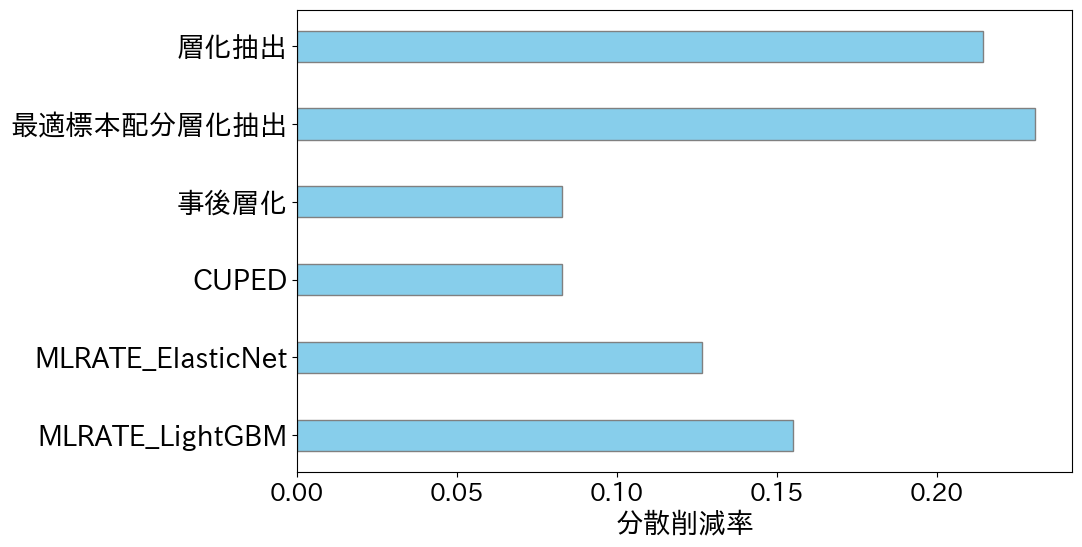

In [54]:
import matplotlib.pyplot as plt
import japanize_matplotlib

# データセット
techniques = ['層化抽出', '最適標本配分層化抽出', '事後層化', 'CUPED', 'MLRATE_ElasticNet', 'MLRATE_LightGBM']

# リストを逆順にする
techniques.reverse()
variance_reduction.reverse()

# グラフの作成
fig, ax1 = plt.subplots(figsize=(10, 6))

# Barグラフ（Variance）をax1に描画
ax1.barh(techniques, variance_reduction, color='skyblue', edgecolor='grey', label='分散削減率(%)',height=0.4)

# ax1の設定
ax1.set_xlabel('分散削減率', color='black', fontsize=20)
ax1.tick_params(axis='both', labelcolor='black', labelsize=18)
ax1.tick_params(axis='y', labelsize=20)

# グラフを表示
plt.show()
